# Visualization

Visualize info, check for correlations between features. Create new informative features and analyze its importance

In [1]:
from xtalphases.data.preprocess import *
from xtalphases import __userpath__ as user_path

In [3]:
user_path = 'D:/USP/IC/Repositório/xtalphases/'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data

Getting data from samples using ```pd.read_csv```.

In [6]:
s3_filename = user_path + '/exploration/data/processed/sample4.csv'

In [8]:
s3_df = pd.read_csv(s3_filename, engine='python')

In [9]:
s3_df['crystal_system'].value_counts()

orthorhombic    423232
monoclinic      414347
tetragonal      200474
trigonal        180785
hexagonal       107959
triclinic        21075
Name: crystal_system, dtype: int64

## Visualization

### Indexes Distribution

In [7]:
def plot_indexes_crystal_system(df):
    crystal_systems = list(df.crystal_system.unique())
    for cs in crystal_systems:
        new_df = df.loc[lambda df: df['crystal_system'] == cs]
        fig, ax = plt.subplots(1, 3, sharey=True)
        ax[0].hist(new_df['index_h'], bins=10, rwidth=0.85, color='crimson', alpha=0.8, align='mid', density=True)
        ax[1].hist(new_df['index_k'], bins=10, rwidth=0.85, color='k', align='mid', density=True)
        ax[2].hist(new_df['index_l'], bins=10, rwidth=0.85, color='darkolivegreen', align='mid', density=True)
        
        fig.suptitle(cs.capitalize(), fontsize=14)
    plt.show()

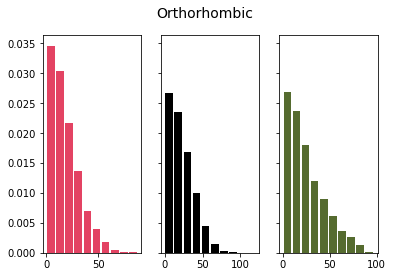

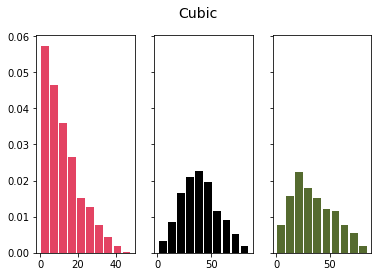

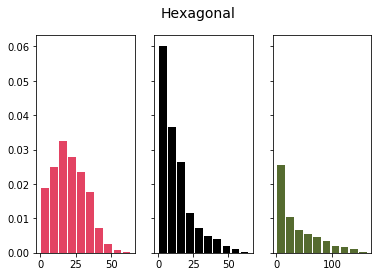

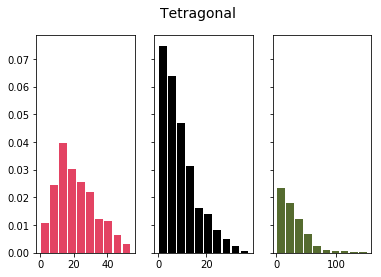

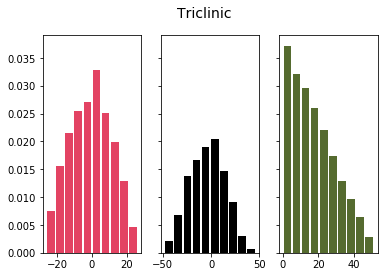

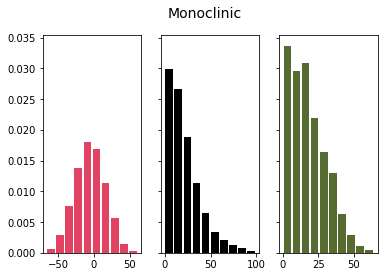

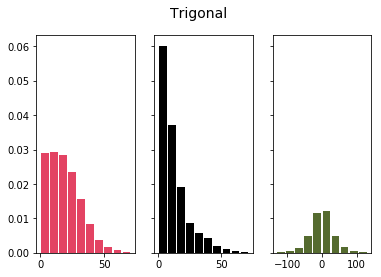

In [8]:
plot_indexes_crystal_system(s3_df)

### Model Phases (PHIMODEL)

* Sum 180° to phases, plot PHIMODEL in bins of 15° and indicate centric reflections with vertical line


In [27]:
bins = list(np.arange(0, 361, 15))

In [28]:
centric_bins = [0, 30, 45, 60, 90, 120, 135, 150, 180, 210, 225, 240, 270, 300, 315, 330, 360]

In [45]:
def plot_phases_crystal_system(df):
    crystal_systems = list(df.crystal_system.unique())
    for cs in crystal_systems:
        new_df = df.loc[lambda df: df['crystal_system'] == cs]
        plt.figure(figsize=(7,3))
        plt.hist((new_df['PHIMODEL']+360.0)%360,   bins=bins, rwidth=0.75, color='#607c8e', align='left', alpha=1, density=True, zorder=2)
        plt.title(cs.capitalize())
        for val in centric_bins[:-1]:
            plt.axvline(x=val, linestyle='dashed', color='gray', zorder=1)
        plt.axvline(x=345, linestyle='dashed', color='gray', zorder=1)
        plt.xlim(-10, 360)
        plt.show()
        

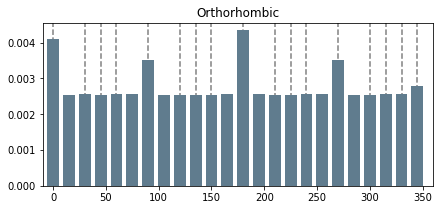

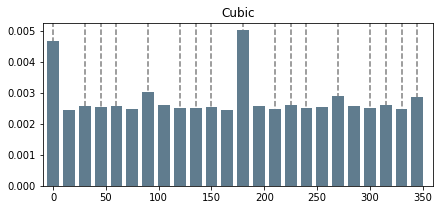

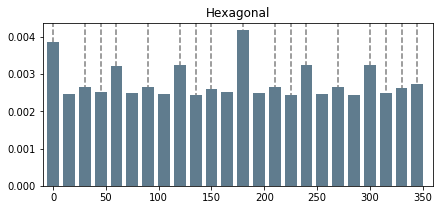

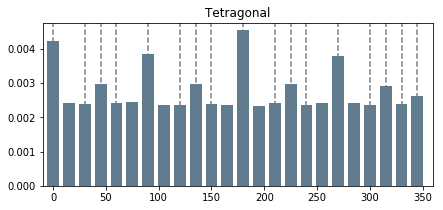

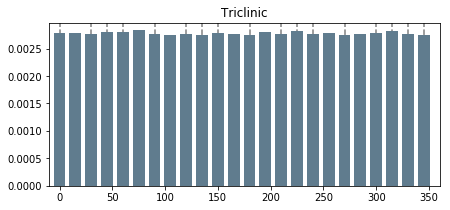

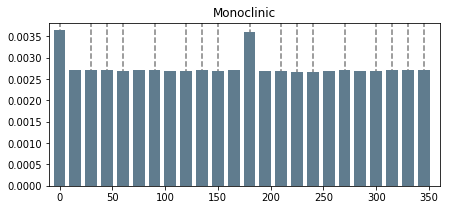

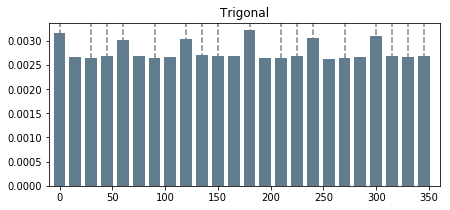

In [46]:
plot_phases_crystal_system(s3_df)

### Phase Error (PHI_ERROR)

In [14]:
def plot_phi_error_dist(df):
    plt.figure(figsize=(8,6))
    plt.hist(df['PHI_ERROR'], bins=40, rwidth=0.7, color='darkolivegreen', align='left', alpha=1.0, density=True)
    plt.xlim(-3, 90)
    plt.title("PHI_ERROR distribution", fontsize=14)
    plt.show()

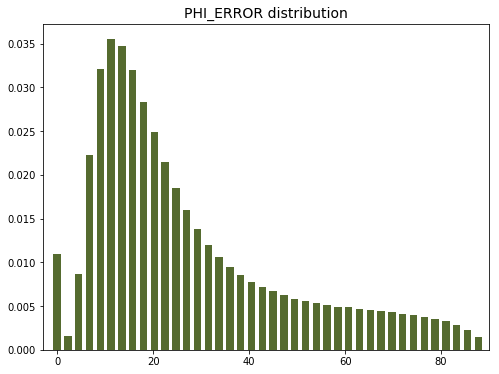

In [15]:
plot_phi_error_dist(s3_df)

### Wilson and Matthews correlation

In [16]:
def scatter_wilson_matthews(df):
    wm_df = df.loc[:, ['WILSON', 'MATTHEWS']]
    wm_df.drop_duplicates(inplace=True)
    wm_df.dropna(inplace=True)
    plt.scatter(x=wm_df.values[:, 0], y=wm_df.values[:, 1], s=20, color='forestgreen')
    ax = plt.gca()
    ax.set_xlabel('Wilson coef.')
    ax.set_ylabel('Matthews coef.')
    plt.show()

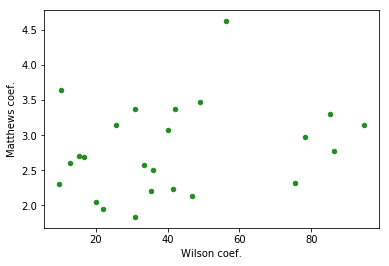

In [17]:
scatter_wilson_matthews(s3_df)

### Fraction of centric reflections

In [18]:
def fraction_of_centric_refln(df):
    phimodel_counts = ((df['PHIMODEL'] + 180.0)%180).value_counts()
    n_centric_refln = 0
    centric_refln = [float(x) for x in centric_bins]
    for value in phimodel_counts.keys():
        if value in centric_bins:
            n_centric_refln += phimodel_counts[value]
    print(n_centric_refln/phimodel_counts.sum())

In [19]:
fraction_of_centric_refln(s3_df)

0.053763698235971755


### Distribution of Structure Factor Amplitudes 

In [7]:
s3_df['ID'].value_counts()

1WYU    245404
1YCE    220618
4NO6    192068
1Z7E    127127
2JIW    123532
2XJN    118619
1U1W    116122
4FAN    101311
1ZAJ    100817
4D8C     99146
2FY8     95877
2AH2     82501
1PQH     80479
4DBR     69429
1O6R     61878
2EUZ     61558
2DV3     60164
5FBG     59797
1YTM     59002
4H4C     57657
4H6X     56494
5EX5     55789
4Q9G     55661
2WBW     55332
2OXY     54998
2X41     53078
1VQU     52514
4RZR     51940
1SNT     51294
4WWI     50393
         ...  
1NHI     27704
5DLP     27011
1JEC     26789
4FRW     26635
1Q5X     26471
5J9C     23739
2GG4     23462
2OZZ     22913
5CN1     21838
1LDT     21409
2C84     19692
1HV8     19070
4QX3     18931
1WQJ     18284
1QGS     18260
2AV5     17987
2ZH9     17823
1F02     15944
4GH9     15702
1PPD     13486
5HM9     12177
5CY8     11633
2RL9     10608
4TZ7      9859
2FD7      9518
2JKF      8878
4H29      7726
5DGY      7620
4XJS      6083
1U42      3188
Name: ID, Length: 79, dtype: int64

In [8]:
single_structure = s3_df.loc[s3_df['ID']=='4FAN']

In [ ]:
plt.plot( color='cadetblue')
plt.show()

In [9]:
test = sorted(zip(single_structure['RESOL'].values, single_structure['FOBS'].values))

In [14]:
test[:, 0]

TypeError: list indices must be integers or slices, not tuple

---
### Further 